In [1]:
import pandas as pd

In [2]:
data = pd.read_excel('champagne_new.xlsx', index_col=0)
data

,monthly_champange
Month,
1964-01-01,2815
1964-02-01,2672
1964-03-01,2755
1964-04-01,2721
1964-05-01,2946
...,...
1972-05-01,4618
1972-06-01,5312
1972-07-01,4298


In [3]:
data.index = pd.to_datetime(data.index)

In [4]:
data.index

DatetimeIndex(['1964-01-01', '1964-02-01', '1964-03-01', '1964-04-01',
               '1964-05-01', '1964-06-01', '1964-07-01', '1964-08-01',
               '1964-09-01', '1964-10-01',
               ...
               '1971-12-01', '1972-01-01', '1972-02-01', '1972-03-01',
               '1972-04-01', '1972-05-01', '1972-06-01', '1972-07-01',
               '1972-08-01', '1972-09-01'],
              dtype='datetime64[ns]', name='Month', length=105, freq=None)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 105 entries, 1964-01-01 to 1972-09-01
Data columns (total 1 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   monthly_champange  105 non-null    int64
dtypes: int64(1)
memory usage: 1.6 KB


In [6]:
import matplotlib.pyplot as plt

In [7]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(data, model='multiplicative')
result

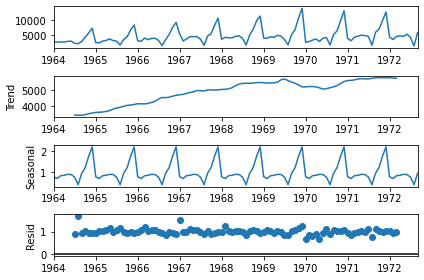

In [8]:
result.plot()
plt.show()

#### high seasonal

#### non-linear

#### does have irregular fluctuation

In [9]:
train = data.loc['1964-01-01':'1970-06-01'] 
test = data.loc['1970-07-01':]

In [10]:
len(train)/(len(data)) #train chiếm ~75%

0.7428571428571429

### Auto - Arima

In [11]:
from pmdarima import auto_arima

In [12]:
stepwise_model = auto_arima(data, start_p=2, start_q=2,
                            max_p=5, max_q=5, m=12,
                            start_P=1, seasonal=True,
                            d=1, D=1, trace=True,
                            error_action='ignore',
                            suppress_warnings=True,
                            stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,1,1)[12]             : AIC=inf, Time=2.36 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1524.662, Time=0.03 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1507.071, Time=0.42 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1490.517, Time=0.55 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=1491.853, Time=0.12 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=1491.669, Time=0.72 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=1491.700, Time=1.80 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=1490.003, Time=0.46 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=1491.649, Time=1.56 sec
 ARIMA(0,1,1)(2,1,1)[12]             : AIC=inf, Time=3.78 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=1516.612, Time=0.21 sec
 ARIMA(1,1,1)(1,1,0)[12]             : AIC=1485.190, Time=0.95 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=1488.819, Time=0.28 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=1486.738, Time=2.52 sec
 ARIMA(1,1,1)(1,1,1)[12]     

In [13]:
print(stepwise_model.aic())

1485.1904967209848


In [14]:
stepwise_model.fit(train)

ARIMA(order=(1, 1, 1), scoring_args={}, seasonal_order=(1, 1, 0, 12),
      suppress_warnings=True, with_intercept=False)

In [15]:
future_forecast1 = stepwise_model.predict(n_periods=len(test))
future_forecast1

array([ 3234.60079994,  1569.58525059,  4979.37608114,  6646.57406913,
       10513.30139797, 13519.6381401 ,  2500.56828971,  2739.8059687 ,
        3216.1445319 ,  3546.82640977,  2831.79656878,  3802.91638555,
        3025.3093094 ,  1357.88620431,  4767.10478315,  6433.18324344,
       10304.09449407, 13317.37463407,  2281.51445036,  2522.10368244,
        2998.0947242 ,  3331.33607167,  2609.92872256,  3586.769226  ,
        2810.86818916,  1143.60180737,  4552.85763776])

In [16]:
future_forecast1 = pd.DataFrame(future_forecast1,index = test.index,columns=['Predict'])

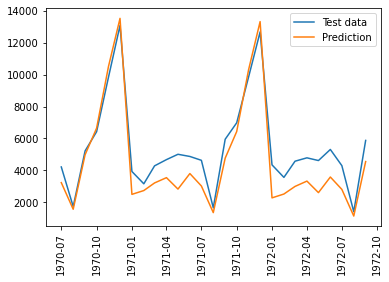

In [17]:
plt.plot(test, label='Test data')
plt.plot(future_forecast1, label='Prediction')
plt.xticks(rotation='vertical')
plt.legend()
plt.show()

### Holtwinters

In [18]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [19]:
model = ExponentialSmoothing(train, seasonal='mul',
                            seasonal_periods=12).fit()
pred = model.predict(start=test.index[0],
                        end=test.index[-1])

c:\program files\python36\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\program files\python36\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
c:\program files\python36\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


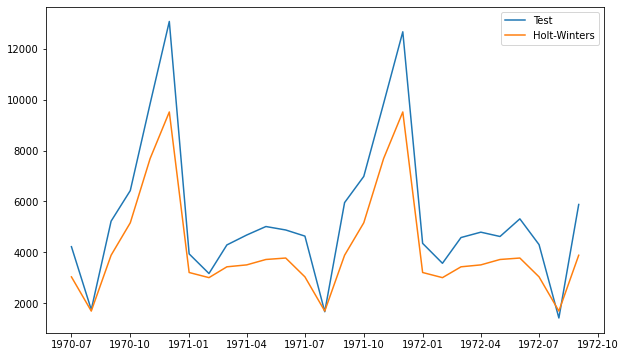

In [20]:
plt.figure(figsize=(10,6))
plt.plot(test.index, test, label='Test')
plt.plot(pred.index, pred, label='Holt-Winters')
plt.legend(loc='best')

#### we can see arima works better with the data => choose stepwise_model

### predict the next 9 months

In [21]:
future_forecast = stepwise_model.predict(n_periods=len(test)+9) 
future_forecast

array([ 3234.60079994,  1569.58525059,  4979.37608114,  6646.57406913,
       10513.30139797, 13519.6381401 ,  2500.56828971,  2739.8059687 ,
        3216.1445319 ,  3546.82640977,  2831.79656878,  3802.91638555,
        3025.3093094 ,  1357.88620431,  4767.10478315,  6433.18324344,
       10304.09449407, 13317.37463407,  2281.51445036,  2522.10368244,
        2998.0947242 ,  3331.33607167,  2609.92872256,  3586.769226  ,
        2810.86818916,  1143.60180737,  4552.85763776,  6219.00897531,
       10089.64786754, 13102.47601709,  2067.70882423,  2308.21007502,
        2784.22373919,  3117.29847431,  2396.30627825,  3372.77438537])

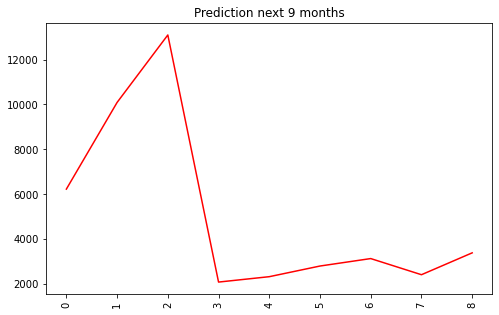

In [22]:
plt.figure(figsize=(8,5))
plt.plot(future_forecast[len(test):], color='red')
plt.xticks(rotation='vertical')
plt.title("Prediction next 9 months")
plt.show()

In [23]:
future_forecast[len(test):]

array([ 6219.00897531, 10089.64786754, 13102.47601709,  2067.70882423,
        2308.21007502,  2784.22373919,  3117.29847431,  2396.30627825,
        3372.77438537])

In [24]:
months = pd.date_range('1972-10-01','1973-06-01', freq='MS').strftime("%Y-%m-%d").tolist()

In [25]:
months

['1972-10-01',
 '1972-11-01',
 '1972-12-01',
 '1973-01-01',
 '1973-02-01',
 '1973-03-01',
 '1973-04-01',
 '1973-05-01',
 '1973-06-01']

In [26]:
new_predict = pd.DataFrame({
    'DATE' : months,
    'Predict': future_forecast[len(test):]}
    )
new_predict

,DATE,Predict
0,1972-10-01,6219.008975
1,1972-11-01,10089.647868
2,1972-12-01,13102.476017
3,1973-01-01,2067.708824
4,1973-02-01,2308.210075
5,1973-03-01,2784.223739
6,1973-04-01,3117.298474
7,1973-05-01,2396.306278
8,1973-06-01,3372.774385


In [27]:
new_predict = new_predict.set_index('DATE')

In [28]:
new_predict.index = pd.to_datetime(new_predict.index)

In [29]:
new_predict

,Predict
DATE,
1972-10-01,6219.008975
1972-11-01,10089.647868
1972-12-01,13102.476017
1973-01-01,2067.708824
1973-02-01,2308.210075
1973-03-01,2784.223739
1973-04-01,3117.298474
1973-05-01,2396.306278
1973-06-01,3372.774385


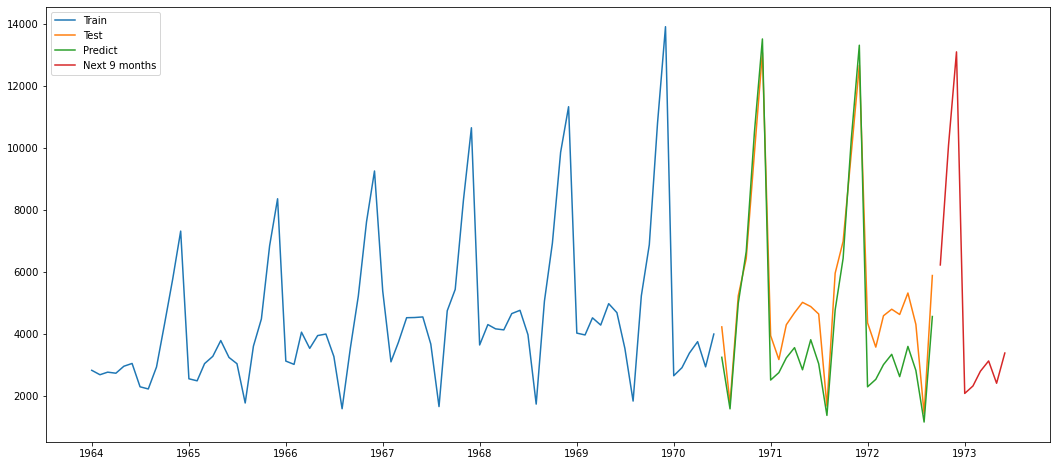

In [30]:
plt.figure(figsize=(18,8))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(future_forecast1.index, future_forecast1, label='Predict')
plt.plot(new_predict.index, new_predict, label='Next 9 months')
plt.legend(loc='best')